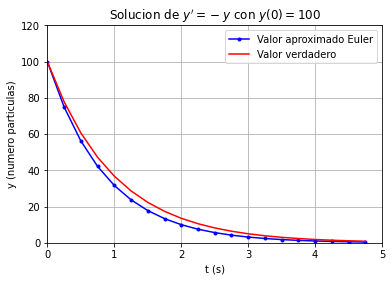

In [5]:
# coding=utf-8
import numpy as np
import matplotlib.pyplot as plt

def EDOEuler(f, y0, t):
    '''Esta función aproxima la solución de la EDO de primer orden
    y'=f(y,t) por medio del método de Euler.

    Parámetros de la función
    ------------------------
    f : función de las variables y, t de la EDO

    y0 : valor inicial de y en t = t0, es decir, y(t0) = y0

    t : conjunto de los valores de t en que se aproximarán los valores de y,
        en forma de una arreglo en una dimensión (1D)

    Salida de la función
    --------------------
    y : arreglo 1D con los valores aproximados de y(t) por medio del método de
        Euler
    '''
    # Se inicializa el arreglo con los valores aproximados utilizando la
    # cantidad de valores de t de interés
    y = np.zeros(len(t))

    # Se establece la condición inicial
    y[0] = y0

    # Se realiza el cálculo de los valores aproximados de y para cada t
    # El ciclo for inicia en 0 y termina en lent(t)-1 pues el primer
    # elemento de los arrays de numpy tiene el índice 0 y a partir
    # de este elemento se tienen que contar los lent(t) demás
    for i in range(0, len(t)-1):
        y[i+1] = y[i]+h*f(y[i], t[i])
    return y

def F(y, t):
    '''Esta función calcula el valor de la función F que corresponde
    a la EDO de primer orden y'=F(y, t)

    Parámetros de la función
    ------------------------
    y : valor y para un punto t particular

    t : valor particular de t

    Salida de la función
    --------------------
    valorF : valor de la función evaludada
    '''
    # Para el caso del decaimiento de partículas inestables
    valorF = -y
    return valorF

# Se define el paso de interés para la aplicación de método de Euler
h = 0.25

# Se define el universo de valores de t de interés y el valor inicial de y
ti = 0.0
tf = 5.0
t = np.arange(ti, tf, h)
y0 = 100.0

# Luego se calculan los valores aproximados de y(t) por Euler
y_aprox_Euler = EDOEuler(F, y0, t)

# Se calculan los valores verdaderos de y(t)
y_verdadero = y0*np.exp(-t)

# Se prepara un gráfico para comparar los resultados
fig = plt.figure()
plt.plot(t, y_aprox_Euler, 'b.-', label='Valor aproximado Euler')
plt.plot(t, y_verdadero, 'r-', label='Valor verdadero')
plt.axis([ti, tf, 0.0, y0+20.0])
plt.xlabel("t (s)")
plt.ylabel("y (numero particulas)")
plt.grid(True)
plt.title("Solucion de $y'=-y$ con $ y(0)=100$")
plt.legend(loc='upper right')
plt.show()

[100.          75.          56.25        42.1875      31.640625
  23.73046875  17.79785156  13.34838867  10.0112915    7.50846863
   5.63135147   4.2235136    3.1676352    2.3757264    1.7817948
   1.3363461    1.00225958   0.75169468   0.56377101   0.42282826]
[100.          77.77777778  60.49382716  47.05075446  36.59503125
  28.46280208  22.13773495  17.21823829  13.39196312  10.41597131
   8.10131102   6.30101968   4.90079309   3.81172796   2.9646773
   2.30586012   1.79344676   1.39490304   1.08492458   0.84383023]


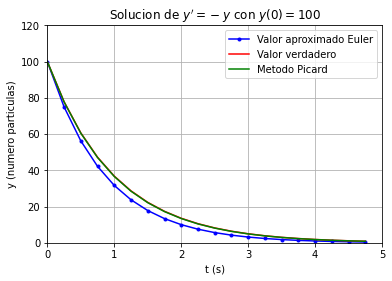

In [6]:
#Metodo de Picard

# y(t) = y(n-1) + int(ti, tf) (f(y, t))

from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np

def trapezoide(h, y):
    return (h/2) * (y[0] + y[1])

def algoritmoPicard(y, h, condicionParada = 0):
    siguienteIteracion = y[0] - trapezoide(h, y)
    if(condicionParada <= 10):
        return algoritmoPicard([y[0],siguienteIteracion], h, condicionParada = condicionParada+1)
    else:
        return siguienteIteracion




def metodoPicard(y, h):
    correccion = np.zeros(y.size)
    correccion[0] = y[0]
    for i in range(y.size-1):
        duplicado = [correccion[i], y[i+1]]
        correccion[i+1] = algoritmoPicard(duplicado, h)
    return correccion

correccion = metodoPicard(y_aprox_Euler, h)
print(y_aprox_Euler)
print(correccion)
fig = plt.figure()
plt.plot(t, y_aprox_Euler, 'b.-', label='Valor aproximado Euler')
plt.plot(t, y_verdadero, 'r-', label='Valor verdadero')
plt.plot(t, correccion, 'green', label = 'Metodo Picard')
plt.axis([ti, tf, 0.0, y0+20.0])
plt.xlabel("t (s)")
plt.ylabel("y (numero particulas)")
plt.grid(True)
plt.title("Solucion de $y'=-y$ con $ y(0)=100$")
plt.legend(loc='upper right')
plt.show()